In [54]:
# This code will convert raw data to readable dataset
import glob 
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

# Read all csv files with same file name in the folder
filenames = sorted(glob.glob('./*.csv'))
appended_data=[]

# Byte conversion
def s16(value):
    return -(value & 0x8000) | (value & 0x7fff)

# Loop
for f in filenames:
    df = pd.read_csv(f, names=['Date','RSSI','Data','Code'], index_col=None)

    # Slicing information from raw data 
    df["ID"] = df["Data"].str.slice(0,2)
    df["X1"] = df["Data"].str.slice(2,4)
    df["X2"] = df["Data"].str.slice(4,6)
    df['X'] = df["X2"]+ df["X1"].map(str)
    df["Y1"] = df["Data"].str.slice(6,8)
    df["Y2"] = df["Data"].str.slice(8,10)
    df['Y'] = df["Y2"]+ df["Y1"].map(str)
    df["Z1"] = df["Data"].str.slice(10,12)
    df["Z2"] = df["Data"].str.slice(12,14)
    df['Z'] = df["Z2"]+ df["Z1"].map(str)
    df["Pa1"] = df["Data"].str.slice(14,16)
    df["Pa2"] = df["Data"].str.slice(16,18)
    df['Pa'] = df["Pa2"]+ df["Pa1"].map(str)
    df["dbm"] = df["Data"].str.slice(18,20)
    df["temp"] = df["Data"].str.slice(20,22)
    df["step1"] = df["Data"].str.slice(22,24)
    df["step2"] = df["Data"].str.slice(24,26)
    df['step'] = df["step2"]+ df["step1"].map(str)
    df["num"] = df["Data"].str.slice(26,28)
    df["stat"] = df["Data"].str.slice(28,30)
    df = df.drop(columns=['X1', 'X2', 'Y1', 'Y2', 'Z1', 'Z2', 'Pa1', 'Pa2', 'step1', 'step2'])
    df = df.drop(df.index[len(df)-1])
    df["ID"] = df["ID"].apply(int,base=16)
    df["X"] = df["X"].apply(int,base=16)
    df['Y'] = df['Y'].apply(lambda x: s16(int(x, base=16)))
    df["Z"] = df['Z'].apply(lambda x: s16(int(x, base=16)))
    df["Pa"] = df['Pa'].apply(int,base=16)
    df["dbm"] = df['dbm'].apply(int,base=16)
    df["temp"] = df['temp'].apply(int,base=16)
    df["step"] = df['step'].apply(int,base=16)
    df["num"] = df['num'].apply(int,base=16)
    df["stat"] = df['stat'].apply(int,base=16)
    
    df["X"] = df["X"]/1000
    df["Y"] = df['Y']/1000
    df["Z"] = df['Z']/1000
    df["Pa"] = df['Pa']+70000
    df["temp"] = df['temp']-30
    df["X"] = df["X"]/1000
    df["Y"] = df['Y']/1000
    df["Z"] = df['Z']/1000
    df["Pa"] = df['Pa']+70000
    df["temp"] = df['temp']-30
    df["Acc"] = ((df["X"]*df["X"])+(df["Y"]*df["Y"])+(df["Z"]*df["Z"])).pow(1./2)

    df['datetime'] =  pd.to_datetime(df['Date'])
    df['datetime'] = df['datetime'] + pd.Timedelta('09:00:00')
    #df.sort_values(by='Date')
    df = df.drop(columns=['RSSI','Data','Code'])
    df = df.sort_values(by='datetime')
       
    # Use cummax so step is not counted shorter  
    df['maxstep'] = df['step'].cummax()
    
    # Reset everytime step difference is negative (for count after 65536)    
    df['real_step'] = df.maxstep + df.maxstep.diff(1).lt(0).cumsum()*65536
    
    
    appended_data = pd.concat(appended_data)

appended_data.to_csv(f'{f[:-15]}_data.csv', index=False)


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ValueError: invalid literal for int() with base 16: '0.'

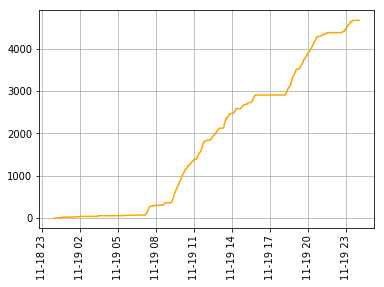

In [53]:
# Plot total step / day 
import matplotlib.pyplot as plt
plt.plot(df['datetime'], df['step']-df['step'].min(), color="orange")
plt.xticks(rotation='vertical')
plt.grid(True)

In [71]:
appended_data

,ID,X,Y,Z,Pa,dbm,temp,step,num,stat,Acc,datetime
0,10,0.000000,0.000000,0.000000,171325,244,-10,0,2,1,0.000000,2018-02-02 11:36:35.320
1,10,0.000000,0.000000,0.000000,171325,244,95,0,3,1,0.000000,2018-02-02 11:36:36.333
2,10,0.000000,0.000000,0.000000,171325,244,95,0,5,1,0.000000,2018-02-02 11:36:38.341
3,10,0.000000,0.000000,0.000000,201072,244,-10,0,0,1,0.000000,2018-02-02 11:36:33.674
4,10,0.000000,0.000000,0.000000,201072,244,-10,0,0,1,0.000000,2018-02-02 11:36:33.675
5,10,0.000000,0.000000,0.000000,171325,244,95,0,7,1,0.000000,2018-02-02 11:36:40.360
6,10,0.000000,0.000000,0.000000,201072,244,-10,0,0,1,0.000000,2018-02-02 11:35:55.439
7,10,0.000000,0.000000,0.000000,171325,244,-10,0,2,1,0.000000,2018-02-02 11:35:57.084
8,10,0.000000,0.000000,0.000000,171325,244,95,0,3,1,0.000000,2018-02-02 11:35:58.094
9,10,0.000000,0.000000,0.000000,171325,244,95,0,5,1,0.000000,2018-02-02 11:36:00.103


In [55]:
data = appended_data.loc[:, ['Acc']]
data = data.set_index(appended_data.datetime)

# Resample using rolling window 

#win = data.rolling(100, min_periods=100).mean()

#win.plot()

data.plot

AttributeError: 'list' object has no attribute 'loc'

In [87]:
win

,Acc
datetime,
2018-02-02 11:36:35.320,NaN
2018-02-02 11:36:36.333,NaN
2018-02-02 11:36:38.341,NaN
2018-02-02 11:36:33.674,NaN
2018-02-02 11:36:33.675,NaN
2018-02-02 11:36:40.360,NaN
2018-02-02 11:35:55.439,NaN
2018-02-02 11:35:57.084,NaN
2018-02-02 11:35:58.094,NaN


In [27]:
window

,Acc
datetime,
2018-02-02 11:50:00,0.000332
2018-02-02 11:50:30,0.000408
2018-02-02 11:51:00,0.001075
2018-02-02 11:51:30,0.001200
2018-02-02 11:52:00,0.005105
2018-02-02 11:52:30,0.003307
2018-02-02 11:53:00,0.003143
2018-02-02 11:53:30,0.001061
2018-02-02 11:54:00,0.005226


In [28]:
win

,Acc
datetime,
2018-02-02 11:50:40.947,NaN
2018-02-02 11:50:41.954,NaN
2018-02-02 11:51:00.281,NaN
2018-02-02 11:51:01.205,NaN
2018-02-02 11:50:59.192,NaN
2018-02-02 11:51:01.204,NaN
2018-02-02 11:50:55.727,NaN
2018-02-02 11:50:55.727,NaN
2018-02-02 11:50:57.507,NaN


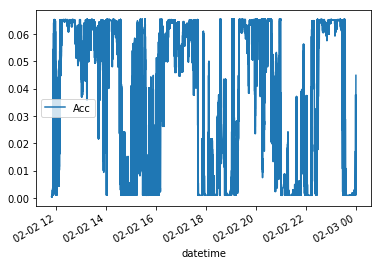

In [29]:
win.plot()